# Small World Network

[D. J. Watts and S. H. Strongatz, Collective dynamics of 'small-world' networks, Nature **393**, 440-442 (1998).](https://www.nature.com/articles/30918)

The feature of a small world network is short path and large clustering. 


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## Generate a small world network by an implemented function

Watts-Strogatz small world network
Graph with 100 nodes and 200 edges
Average clustering coefficient =  0.37433333333333335


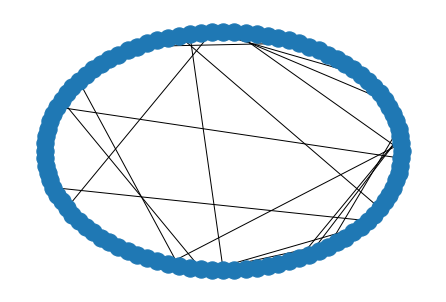

In [10]:
n = 100 # number of nodes
k = 4 # degree
p = 0.1 # edge probability

print('Watts-Strogatz small world network')
G1 = nx.watts_strogatz_graph(n, k, p)
pos = nx.circular_layout(G1)
print(nx.info(G1)) # output graph information
print('Average clustering coefficient = ', nx.average_clustering(G1))
nx.draw(G1, pos)
plt.show()

## Generate a small world network from scratch 

self-coded small world network
Graph with 100 nodes and 200 edges
Average clustering coefficient =  0.3170000000000001


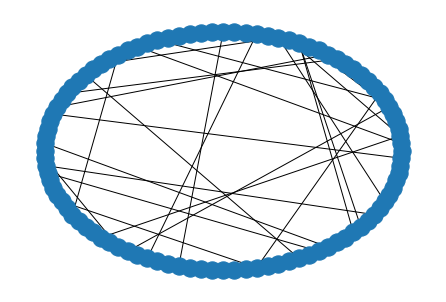

In [11]:
# self-coding module
def gen_WS_network(n, k, p, seed=None):

    if seed is not None:
        np.random.seed(seed=seed)
    
    G = nx.Graph()
    G.add_nodes_from(list(range(n)))

    for ind in range(n):
        for jnd in range(k//2):
            G.add_edge(ind, (ind+jnd+1)%n) # %n is necessary for generateing an edge associated with the ending point.
    
    for (u, v) in G.edges():
        if np.random.rand() < p: # probability for exchanging two edges
            G.remove_edge(u, v)
            new_edge = (u + np.random.randint(n-1) + 1)%n 

            while G.has_edge(u, new_edge) == True: # Skip already existed edge
                new_edge = (u + np.random.randint(n-1) + 1)%n
            
            G.add_edge(u, new_edge)
    
    return G

n = 100
k = 4
p = 0.1

print('self-coded small world network')
G2 = gen_WS_network(n, k, p)
pos = nx.circular_layout(G2)

print(nx.info(G2)) # output graph information
print('Average clustering coefficient = ', nx.average_clustering(G2))
nx.draw(G2, pos)
plt.show()


## Comparison

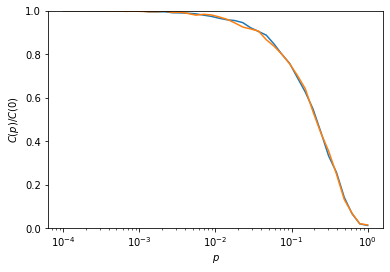

In [16]:
n = 1000
k = 10

G01 = gen_WS_network(n, k, 0)
C01 = nx.average_clustering(G01)
G02 = nx.watts_strogatz_graph(n, k, 0)
C02 = nx.average_clustering(G02)

p = np.logspace(-4, 0, 40)

C1 = []
C2 = []

for pval in p:
    G1 = gen_WS_network(n, k, pval)
    C1.append(nx.average_clustering(G1))
    G2 = nx.watts_strogatz_graph(n, k, pval)
    C2.append(nx.average_clustering(G2))

C1 = np.array(C1) / C01
C2 = np.array(C2) / C02

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(p, C1, label='self-coding')
ax.plot(p, C2, label='Networkx')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$C(p)/C(0)$')
ax.set_ylim(0, 1)
ax.set_xscale('log')
plt.show()